In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import folium
import missingno as msno
import home_made_functions as hmf

#warnings.filterwarnings("ignore")

<h1  style= "background-color: gray;
                 color:white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Préparation des données </h1>

## 1. Introduction

academy est une edtech qui propose de contenus de formation en ligne de niveau lycée et université.L'entreprise envisage une internationalisation et l'objectif de ce projet est analyser des données issues de la banque mondiale afin de déterminer les pays à fort potentiel.

Dans cette première partie, nous allons analyser, trier et consolider les données.

**Plan d'action :**
1. Analyser les fichiers et valider la qualité des données.
2. Consolider les données 
3. Selectionner les indicateurs pertinents
3. Déterminer une période à étudier.
4. Filtrer les données en fonction des choix précédents
5. Exporter le jeu de donnés final pour l'analyse.


## 2. Analyse des fichiers

### 2.1. Fichier EdStatsCountry-Series

In [5]:
df1 = hmf.read_data('csv', './data/EdStatsCountry-Series.csv')
df1.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p> <b>Ce fichier décrit la provenance de l'indicateur. </b></p>

*********************************** Data infos ***********************************
Nombre de colonnes :  4 

Nombre de lignes :  613 


 ********************************** Valeurs manquantes **********************************


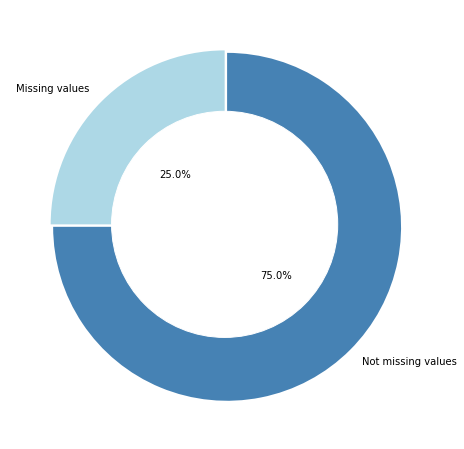

Nombre total de valeurs manquantes :  613

 *********************************** Clés potentielles *********************************** 

['CountryCode', 'SeriesCode']
['CountryCode', 'SeriesCode', 'DESCRIPTION']
['CountryCode', 'SeriesCode', 'Unnamed: 3']
['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

Nombre de duplicated rows :  0 

************************** Nombre de valeurs uniques par colonne ************************** 

CountryCode  :  211 

SeriesCode  :  21 

DESCRIPTION  :  97 

Unnamed: 3  :  1 

*************************** Les provenances les plus fréquentes *************************** 

Data sources : United Nations World Population Prospects                                       154
Data sources: United Nations World Population Prospects                                        137
Estimates are based on regression.                                                              84
Data sources : Eurostat                                                              

In [6]:
# On décrit le fichier
hmf.describe_data(df1)

# check potentielles clés
print("\n",'*'*35,"Clés potentielles",'*'*35, "\n")
hmf.cles_potentielles(df=df1)


#Check duplicated row
print()
print("Nombre de duplicated rows : ",len(df1[df1.duplicated(subset=['CountryCode', 'SeriesCode'])]),"\n")

hmf.infos_columns(df1)

print("*"*27,"Les provenances les plus fréquentes","*"*27,"\n")
print(df1['DESCRIPTION'].value_counts().head(10))

<div class="alert-warning"> <b>Attention : </b> Ce jeu de donnés ne nous sera pas utile pour la suite de l'analyse.</div>

### 2.2. Fichier EdStatsCountry

In [7]:
df2 = hmf.read_data('csv', './data/EdStatsCountry.csv')
df2.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p><b> Ce fichier donne des informations sur les pays</b> (leur bloc géographique, leur catégorie en fonction du revenu, etc...).<br><b> Il contient des informations pertinentes pour l'analyse.</b></p>

*********************************** Data infos ***********************************
Nombre de colonnes :  32 

Nombre de lignes :  241 


 ********************************** Valeurs manquantes **********************************


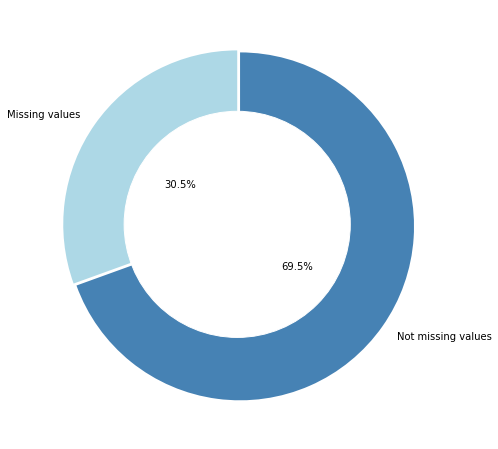

Nombre total de valeurs manquantes :  2354

 ****************************** Clés potentielles ****************************** 

['Country Code']
['Short Name']
['Table Name']
Nombre maximum autorisé atteint. Veuillez augmenter cette valeur si vous voulez rechercher davantage de clés primaires candidates.

Nombre de duplicated rows :  0 

************************** Nombre de valeurs uniques par colonne ************************** 

Country Code  :  241 

Short Name  :  241 

Table Name  :  241 

Long Name  :  241 

2-alpha code  :  239 

Currency Unit  :  153 

Special Notes  :  132 

Region  :  8 

Income Group  :  6 

WB-2 code  :  241 

National accounts base year  :  44 

National accounts reference year  :  12 

SNA price valuation  :  3 

Lending category  :  4 

Other groups  :  3 

System of National Accounts  :  4 

Alternative conversion factor  :  33 

PPP survey year  :  4 

Balance of Payments Manual in use  :  2 

External debt Reporting status  :  4 

System of trade  :  3 

In [8]:
# On décrit le fichier
hmf.describe_data(df2, figsize=(9,4))

#check potentielles clés
print("\n",'*'*30,"Clés potentielles",'*'*30, "\n")
hmf.cles_potentielles(df=df2, max_allowed=2)

#Check duplicated row
print()
print("Nombre de duplicated rows : ",len(df2[df2['Country Code'].duplicated()]),"\n")

hmf.infos_columns(df2)

#### Un peu plus d'exploration ...

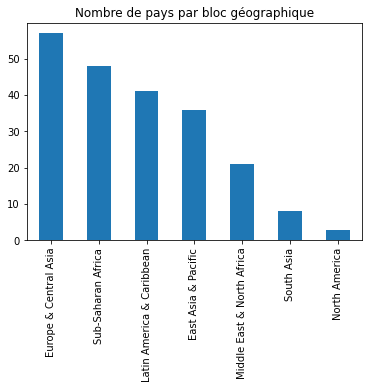

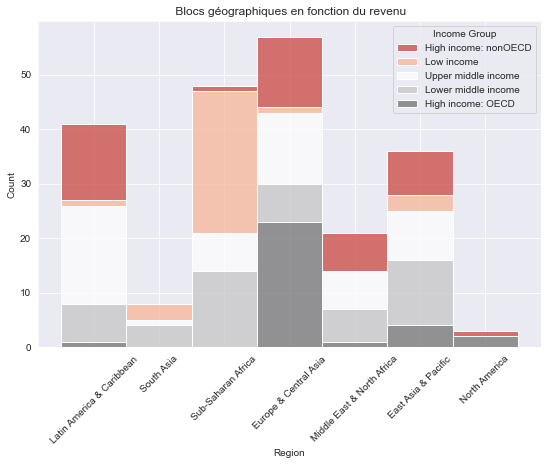

In [9]:
# Region
df2['Region'].value_counts().plot(kind='bar')
plt.title('Nombre de pays par bloc géographique')
plt.show()

# Region x Income
sns.set_style('darkgrid')
plt.figure(figsize=(9,6))
sns.histplot(data=df2, x='Region', hue='Income Group', multiple='stack', palette="RdGy")
plt.xticks(rotation=45)
plt.title(' Blocs géographiques en fonction du revenu')
plt.show()

<div class="alert-warning"> <b>Attention : </b> Les colonnes <b>Income group</b> et <b>Region</b> contiennent chacune <b>27 valeurs manquantes</b>.</div>

#### Préparation des données pertientes du fichier ...

In [10]:
df2[df2['Region'].isnull()].head()
erreurs_noms_pays = df2[df2['Region'].isnull()]["Short Name"].unique().tolist()
print("il ya",len(erreurs_noms_pays), "groupements de pays et erreurs parmis le noms de pays")
display(df2[df2['Region'].isnull()]["Short Name"].unique().tolist())

il ya 27 groupements de pays et erreurs parmis le noms de pays


['Arab World',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (all income levels)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (all income levels)',
 'Euro area',
 'European Union',
 'Gibraltar',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'Latin America & Caribbean (developing only)',
 'Latin America & Caribbean (all income levels)',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'Middle East & North Africa (all income levels)',
 'Middle income',
 'Middle East & North Africa (developing only)',
 'North America',
 'Nauru',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa (developing only)',
 'Sub-Saharan Africa (all income levels)',
 'Upper middle income',
 'World']

<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p> En regardant de plus près, nous pouvons constater que ces <b>27 valeurs manquantes</b> au niveau de Income group et Region sont <b>concernent les groupements de pays</b>.</p>
    <p><b> Nous allons supprimer les groupementes de pays pour la suite de l'analyse.</b> </p>

*********************************** Data infos ***********************************
Nombre de colonnes :  4 

Nombre de lignes :  214 


 ********************************** Valeurs manquantes **********************************


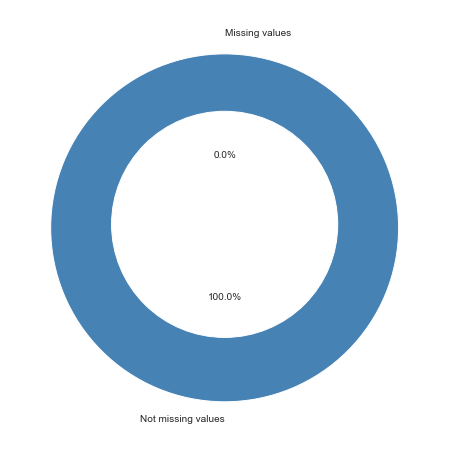

Nombre total de valeurs manquantes :  0
************************** Nombre de valeurs uniques par colonne ************************** 

Country Code  :  241 

Short Name  :  241 

Table Name  :  241 

Long Name  :  241 

2-alpha code  :  239 

Currency Unit  :  153 

Special Notes  :  132 

Region  :  8 

Income Group  :  6 

WB-2 code  :  241 

National accounts base year  :  44 

National accounts reference year  :  12 

SNA price valuation  :  3 

Lending category  :  4 

Other groups  :  3 

System of National Accounts  :  4 

Alternative conversion factor  :  33 

PPP survey year  :  4 

Balance of Payments Manual in use  :  2 

External debt Reporting status  :  4 

System of trade  :  3 

Government Accounting concept  :  3 

IMF data dissemination standard  :  3 

Latest population census  :  28 

Latest household survey  :  61 

Source of most recent Income and expenditure data  :  76 

Vital registration complete  :  3 

Latest agricultural census  :  36 

Latest industrial dat

In [11]:
df2_final = df2[['Country Code', 'Short Name','Region', 'Income Group' ]]
df2_final = df2_final.dropna()
df2_final.rename(columns={'Short Name':'Country'}, inplace=True)

hmf.describe_data(df2_final)

hmf.infos_columns(df2)

### 2.3. Fichier EdStatsData

In [12]:
df3 = hmf.read_data('csv', './data/EdStatsData.csv')
df3.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p>De manière générale, ce dataframe présente les <b>valeurs des indicateurs en fonction des années</b> (comprises entre 1970 et 2040). </p>
        <ul>Les colonnes pertinentes pour l'analyse sont :
            <li><b>Country Code</b> : clé pour des éventuelles fusions.</li>
            <li><b>Country Name</b> : nous permettra d'avoir le nom du pays</li>
            <li><b>Indicator Code</b> : clé pour les éventuelles fusion</li>
            <li><b>Indicator Name</b> : nous pemettra d'avoir le nom de l'indicateur</li>
            <li><b>Période à analyser</b> : nous allons étudier les <b>données comprises entre 2000 et 2015</b>.</li>
        </ul> </div>

*********************************** Data infos ***********************************
Nombre de colonnes :  70 

Nombre de lignes :  886930 


 ********************************** Valeurs manquantes **********************************


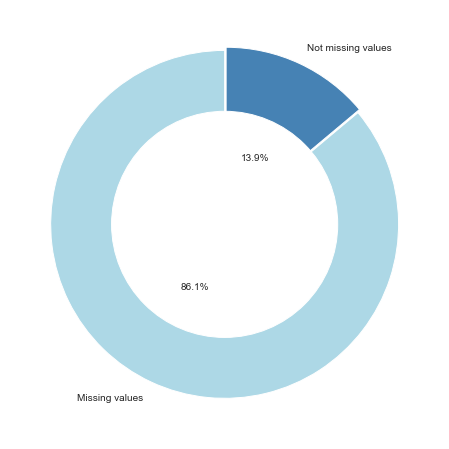

Nombre total de valeurs manquantes :  53455179

 ****************************** Clés potentielles ****************************** 

['Country Name', 'Indicator Name']
['Country Name', 'Indicator Code']
['Country Code', 'Indicator Name']
Nombre maximum autorisé atteint. Veuillez augmenter cette valeur si vous voulez rechercher davantage de clés primaires candidates.

Nombre de duplicated rows :  0 

************************** Nombre de valeurs uniques par colonne ************************** 

Country Name  :  242 

Country Code  :  242 

Indicator Name  :  3665 

Indicator Code  :  3665 

1970  :  24596 

1971  :  30893 

1972  :  30983 

1973  :  30989 

1974  :  31140 

1975  :  37839 

1976  :  32680 

1977  :  32809 

1978  :  32888 

1979  :  32360 

1980  :  39457 

1981  :  34091 

1982  :  32970 

1983  :  33684 

1984  :  33904 

1985  :  41134 

1986  :  34775 

1987  :  34022 

1988  :  34014 

1989  :  33182 

1990  :  72801 

1991  :  67173 

1992  :  68027 

1993  :  68441 


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,51436.00,51436.00,51436.00,51436.00,51436.00,51436.00,51436.00,51436.00,51436.00,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,722.49,727.13,728.38,726.65,722.83,717.69,711.31,703.43,694.03,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,22158.45,22879.90,23523.38,24081.49,24558.97,24965.87,25301.83,25560.69,25741.89,NaN
min,-1.440000e+00,-1.590000e+00,-3.060000e+00,-4.030000e+00,-4.210000e+00,-3.660000e+00,-2.950000e+00,-3.170000e+00,-3.560000e+00,-2.970000e+00,...,-1.63,-1.44,-1.26,-1.09,-0.92,-0.78,-0.65,-0.55,-0.45,NaN
25%,8.900000e-01,8.850000e+00,9.240000e+00,9.600000e+00,9.860000e+00,1.400000e+00,9.310000e+00,9.520000e+00,1.000000e+01,1.000000e+01,...,0.03,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.01,NaN
50%,6.320000e+00,6.316000e+01,6.655000e+01,6.970000e+01,7.088000e+01,9.680000e+00,7.102000e+01,7.133000e+01,7.291000e+01,7.510000e+01,...,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.22,NaN
75%,6.251000e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854000e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.50,7.50,7.30,7.10,6.72,6.08,5.46,4.68,4.03,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2951568.84,3070878.84,3169710.61,3246239.22,3301586.19,3337871.21,3354746.27,3351886.89,3330483.54,NaN


In [13]:
hmf.describe_data(df3, figsize=(20,4))

#check potentielles clés
print("\n",'*'*30,"Clés potentielles",'*'*30, "\n")
hmf.cles_potentielles(df=df3, max_allowed=2)

#Check duplicated row
print()
print("Nombre de duplicated rows : ",len(df3[df3.duplicated(subset=['Country Name', 'Indicator Name'])]),"\n")


hmf.infos_columns(df3)

df3.describe().round(2)

<div class="alert-warning"> <b>Attention : </b> Il y a <b> énormement de valeurs manquantes</b> au niveau des valeurs des indicateurs. <b>Cette information est à prendre en compte pour déterminer la période à étudier.</b></div>

### Préparation du dataframe pour l'analyse...

In [14]:
df3_final = df3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015',]]
df3_final.rename(columns={'Country Name':'Country', 'Indicator Name':'Indicator'}, inplace=True)
df3_final.head()

/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_4672/2424853174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_final.rename(columns={'Country Name':'Country', 'Indicator Name':'Indicator'}, inplace=True)


,Country,Country Code,Indicator,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


### 2.4. Fichier EdStatsFootNote

In [15]:
df4 = hmf.read_data('csv', './data/EdStatsFootNote.csv')
df4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p> <b>Ce fichier donne des informations sur l'année d'origine et la nature l'indicateur. </b></p>

*********************************** Data infos ***********************************
Nombre de colonnes :  5 

Nombre de lignes :  643638 


 ********************************** Valeurs manquantes **********************************


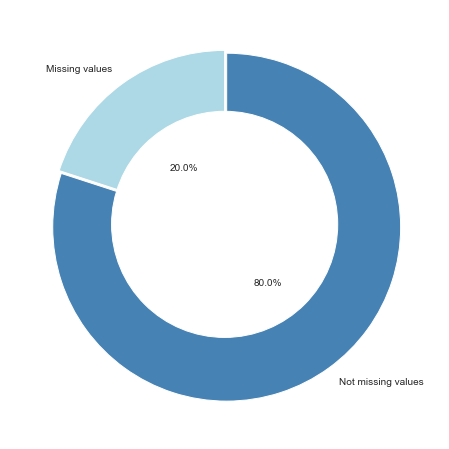

Nombre total de valeurs manquantes :  643638

 ****************************** Clés potentielles ****************************** 

['CountryCode', 'SeriesCode', 'Year']
['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION']
['CountryCode', 'SeriesCode', 'Year', 'Unnamed: 4']
['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

Nombre de duplicated rows :  0 

************************** Nombre de valeurs uniques par colonne ************************** 

CountryCode  :  239 

SeriesCode  :  1558 

Year  :  56 

DESCRIPTION  :  9102 

Unnamed: 4  :  1 

******************** Les sources et/ou méthodes les plus courantes ******************** 

Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
National Estimate                                  23570
C

In [16]:
hmf.describe_data(df4)

#check potentielles clés
print("\n",'*'*30,"Clés potentielles",'*'*30, "\n")
hmf.cles_potentielles(df=df4)

#Check duplicated row
print()
print("Nombre de duplicated rows : ",len(df4[df4.duplicated(subset=['CountryCode', 'SeriesCode', 'Year'])]),"\n")


hmf.infos_columns(df4)

print("*"*20,"Les sources et/ou méthodes les plus courantes","*"*20,"\n")
print(df4['DESCRIPTION'].value_counts().head(10))


<div class="alert-warning"> <b>Attention : </b> Ce jeu de donnés ne nous sera pas utile pour la suite de l'analyse.</div>

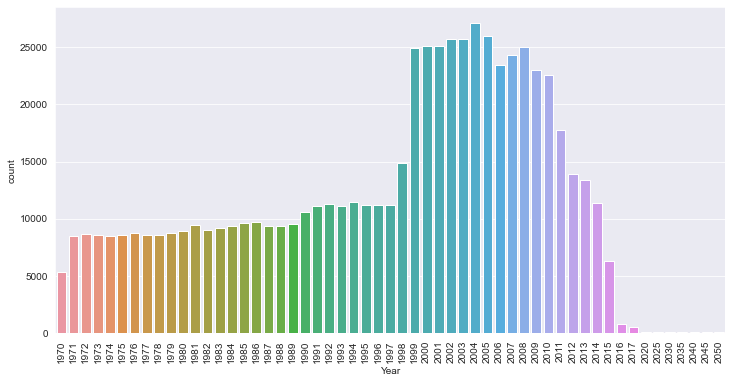

In [17]:
# On prépare la colonne années
df4['Year']= df4['Year'].apply(lambda x : x[2:])
df4 = df4.sort_values(by='Year')

# On plot
plt.figure(figsize=(12,6))
sns.countplot(data=df4, x='Year')
plt.xticks(rotation=90)
plt.show()


### 2.5. Fichier EdStatsSeries

In [18]:
df5 = hmf.read_data('csv', './data/EdStatsSeries.csv')
df5.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
    <p> <b>Ce jeu de données donne plusieurs caractéristiques de l'indicateur: catégorie, définition ,méthode de calcul, source, etc ...</b></p>
</div>       

*********************************** Data infos ***********************************
Nombre de colonnes :  21 

Nombre de lignes :  3665 


 ********************************** Valeurs manquantes **********************************


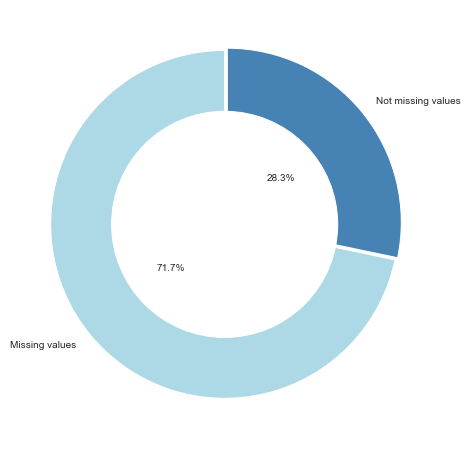

Nombre total de valeurs manquantes :  55203

 ****************************** Clés potentielles ****************************** 

['Series Code']
['Indicator Name']
['Series Code', 'Topic']
['Series Code', 'Indicator Name']
['Series Code', 'Short definition']
['Series Code', 'Long definition']
['Series Code', 'Unit of measure']
['Series Code', 'Periodicity']
['Series Code', 'Base Period']
['Series Code', 'Other notes']
['Series Code', 'Aggregation method']
Nombre maximum autorisé atteint. Veuillez augmenter cette valeur si vous voulez rechercher davantage de clés primaires candidates.

Nombre de duplicated rows :  0 

************************** Nombre de valeurs uniques par colonne ************************** 

Series Code  :  3665 

Topic  :  37 

Indicator Name  :  3665 

Short definition  :  1170 

Long definition  :  2060 

Unit of measure  :  1 

Periodicity  :  2 

Base Period  :  5 

Other notes  :  15 

Aggregation method  :  4 

Limitations and exceptions  :  10 

Notes from orig

In [19]:
hmf.describe_data(df5)

#check potentielles clés
print("\n",'*'*30,"Clés potentielles",'*'*30, "\n")
hmf.cles_potentielles(df=df5)

#Check duplicated row
print()
print("Nombre de duplicated rows : ",len(df5[df5['Series Code'].duplicated()]),"\n")

hmf.infos_columns(df5)

#### Un peu d'exploration...

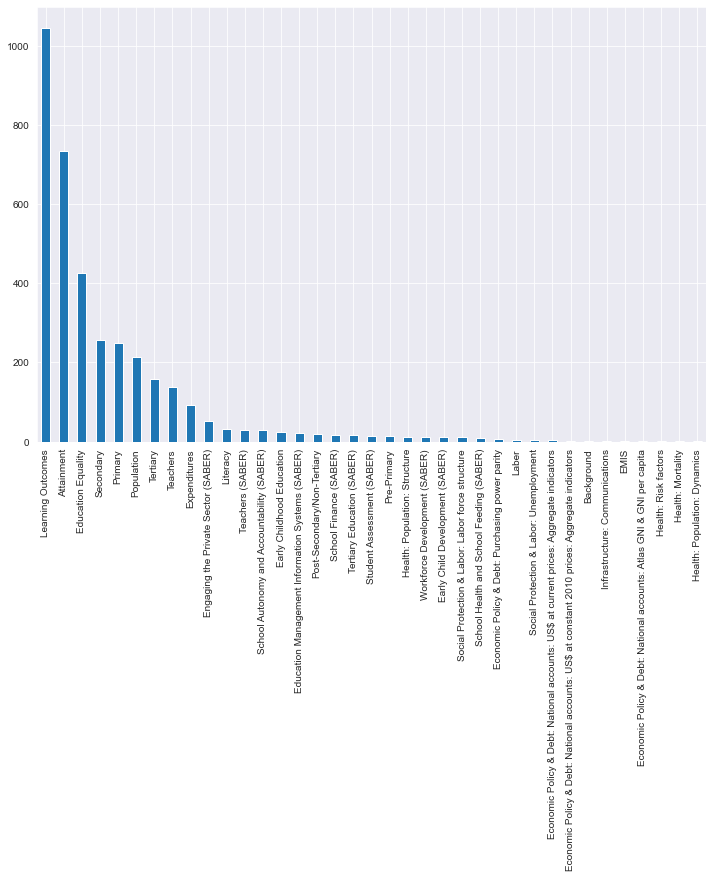

In [20]:
plt.figure(figsize=(12,8))
df5['Topic'].value_counts().plot(kind='bar')
plt.show()

### 3. Consolidation des données

In [21]:
data =  df2_final.merge(df3, on=['Country Code'], how='inner')
data.rename(columns={'Country_x':'Country'}, inplace=True)

In [22]:
data.head()

,Country Code,Country,Region,Income Group,Country Name,Indicator Name,Indicator Code,1970,1971,1972,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data= pd.concat([data.loc[:,['Region', 'Country','Country Code','Income Group','Indicator Name']],data.loc[:,'2000':'2015']], axis=1)
data.head()

,Region,Country,Country Code,Income Group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",56.156502,45.716419,52.996460,49.965080,53.096840,...,NaN,60.718788,60.643719,62.808041,NaN,78.047157,NaN,NaN,NaN,NaN
1,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",59.691120,49.288391,59.051239,58.223461,57.107738,...,NaN,65.384621,65.938301,68.178833,NaN,82.111633,NaN,NaN,NaN,NaN
2,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",1.133350,1.169290,1.259030,1.399530,1.164840,...,NaN,1.166480,1.189450,1.184040,NaN,1.108400,NaN,NaN,NaN,NaN
3,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, ...",52.667679,42.152470,46.902020,41.602249,49.026192,...,NaN,56.052959,55.436161,57.581570,NaN,74.081360,NaN,NaN,NaN,NaN
4,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,"Adjusted net enrolment rate, primary, both sex...",98.253593,96.615707,95.397629,93.974838,94.776360,...,98.649353,98.926811,99.114319,95.995422,98.920464,NaN,NaN,NaN,99.307243,NaN


### 4. Selection des indicateurs pertinents

Selection basée sur 3 types d'indicateurs

In [21]:
data.rename(columns={'Indicator Name':'Indicator'},inplace=True)

In [22]:
data[data['Indicator'].str.contains('computer')]['Indicator'].unique()

array(['Personal computers (per 100 people)',
       'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience',
       'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment',
       'PIAAC: Female adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test',
       'PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test',
       'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test',
       'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment'],
      dtype=object)

In [23]:
df5[df5['Indicator Name'] == 'Net enrolment rate, lower secondary, both sexes (%)']['Long definition'].tolist()

['Total number of students in the theoretical age group for lower secondary education enrolled in that level, expressed as a percentage of the total population in that age group. Divide the number of students enrolled who are of the official age group for lower secondary education by the population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.']

### 4.1. Indicateurs sociaux-économiques

Trois indicateurs permettant d'avoir une vue sur le potentiel socio-économique du pays.
- **GDP per capita (current US$)** : vision sur les moyens du pays
- **Population growth (annual %)** : vision sur la croissance démographique du pays
- **Population, total** 

### 4.2. Indicateurs liés à l'accès au matériel nécessaire

Deux indicateurs permettant d'avoir une vue sur l'accès au matériel nécessaire.
- **Internet users (per 100 people)** : vision sur l'accès à internet
- **Personal computers (per 100 people)** : vision sur le matériel nécessaire

#### 4.3. Indicateurs liés à l'éducation

Trois indicateurs permettant d'avoir une vue sur le nombre client potentiel du pays.
- **Enrolment in secondary education, both sexes (number)**
- **Enrolment in tertiary education, all programmes, both sexes (number)**
- **Enrolment in post-secondary non-tertiary education, both sexes (number)**

In [ ]:
indicators = ['GDP per capita (current US$)',
              'Population growth (annual %)',
              'Population, total',
              'Expenditure on education as % of total government expenditure (%)',
              'Internet users (per 100 people)',
              'Personal computers (per 100 people)',
              'Enrolment in secondary education, both sexes (number)',
              'Enrolment in tertiary education, all programmes, both sexes (number)',
              'Enrolment in post-secondary non-tertiary education, both sexes (number)',]

In [ ]:
data_final= data[data['Indicator'].isin(indicators)]
data_final.head()

In [ ]:
data_final = data_final.melt(id_vars=['Region', 'Country Code', 'Country', 'Income Group','Indicator'], var_name='Year')
data_final = data_final.pivot_table(index=['Region', 'Country Code','Country', 'Year', 'Income Group'], columns='Indicator')
data_final.head()

In [ ]:
#data_final = data_final.melt(id_vars=['Region', 'Country Code', 'Country', 'Income Group','Indicator',],value_vars=['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015'], var_name='Year')
#data_final = data_final.pivot_table(index=['Region', 'Country Code','Country', 'Year', 'Income Group'], columns='Indicator')
#data_final.head()

In [ ]:
data_final.head(1)

In [ ]:
data_final.columns = ['Enrolment in post-secondary non-tertiary education, both sexes (number)',
                      'Enrolment in secondary education, both sexes (number)',
                      'Enrolment in tertiary education, all programmes, both sexes (number)',
                      'Expenditure on education as % of total government expenditure (%)',
                      'GDP per capita (current US$)',
                      'Internet users (per 100 people)',
                      'Personal computers (per 100 people)',
                      'Population growth (annual %)',
                      'Population, total']
data_final = data_final.reset_index()

data_final.rename(columns={'Enrolment in post-secondary non-tertiary education, both sexes (number)':'Enrolment in post-secondary non-tertiary',
                          'Enrolment in secondary education, both sexes (number)':'Enrolment in secondary',
                          'Enrolment in tertiary education, all programmes, both sexes (number)':'Enrolment in tertiary',
                          'Expenditure on education as % of total government expenditure (%)':'Expenditure on education'}, inplace=True)

data_final.head()

### 5.Prise en charge des valeurs manquantes

Il existe 3 catégories de données manquantes, à savoir:

- **Missing Completely At Random (MCAR)**: Les données manquantes résultent du hasard : elles sont **aléatoires**. Comme exemple nous avons erreurs de saisie, les pannes de capteur temporaires. Les données manquantes ne sont associées à aucun facteur extérieur en général leur nombre est faible.

- **Missing At Random (MAR)**: les valeurs manquantes sont **correlées** entre-elles et leur nombre est variable...

- **Missing Not At Random (MNAR)**: les valeurs manquantes sont en **grande quantité**, et leur origine est associée à des facteurs indépendants de notre volonté ou de nos connaissances.

Source : https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb

Savoir catégoriser les missing values permet de mettre en place la stratégie d'imputation la plus optimale.

#### 5.1. Définition de la stratégie d'imputation

In [ ]:
print(data_final.isnull().mean().sort_values(ascending=False))

In [ ]:
data_final[data_final['Population, total'].isnull()]

In [ ]:
data_final.loc[data_final['Country'] == 'Sint Maarten (Dutch part)', ['Population, total']] = data_final.loc[data_final['Country'] == 'Sint Maarten (Dutch part)', ['Population, total']].ffill()
data_final.loc[data_final['Country'] == 'Eritrea', ['Population, total']] = data_final.loc[data_final['Country'] == 'Eritrea', ['Population, total']] .ffill()
data_final.loc[data_final['Country'] == 'South Sudan', ['Population, total']] = data_final.loc[data_final['Country'] == 'South Sudan', ['Population, total']].ffill()

In [ ]:
data_final[data_final['GDP per capita (current US$)'].isnull()]['Country'].unique()

In [ ]:
data_final = data_final.dropna(subset=['GDP per capita (current US$)'])

In [ ]:
data_final[data_final['Population growth (annual %)'].isnull()]['Country'].unique()

In [ ]:
data_final.info()

In [ ]:
# data_final = data_final.drop(labels=['Enrolment in post-secondary non-tertiary','Personal computers (per 100 people)'],axis=1)

In [ ]:
msno.matrix(data_final, figsize=(9,4), fontsize=8)
plt.show()
data_final.isnull().mean()[data_final.isnull().mean()>0]

In [ ]:
msno.heatmap(data_final, figsize=(9,4), fontsize=8)
plt.show()
sns.heatmap(data_final.corr(), annot=True, linecolor='k', linewidths=2,vmin=-1, vmax=1)
plt.show()

Nous constatons que certaines variables présentent des corrélations linéaires, notamment :
- la variable population est corélée aux variables enrolment in secondary et enrolment in tertiary.
- la variable GDP est aussi corélée à Internet Users.

Nous avons commencé par une imputation avec KNN imputer, puis itérative imputer, les résustats étaient peu satisfaisants. En effet, plusieurs valeurs négatives apparaissent sur des variables telles que enrolment in tertiary et expenditure.

Avec la matrice de corrélation plus haut, nous pouvons constater que certainent variables comportant des données manquantes présentent des corrélations linéaires avec d'autres variables. De ce fait, nous avons décidé d'opter pour prédire les valeurs manquantes de ces variables linéairement corrélées à des variables plutôt complètes(pas ou quasiment pas de nan) par modèle linéaire pour la suite de l'analyse.

In [ ]:
data_ml = data_final.iloc[:,5:].copy(deep=True)

#### Estimation des missing values de Enrolment in secondary 

Nous allons **prédire les valeurs manquantes de enrolment in secondary** avec **population totale comme variable explicative** par modèle linéaire

In [ ]:
sns.scatterplot(data= data_ml, x ='Population, total', y='Enrolment in secondary')
plt.show()

In [ ]:
def check_outliers(data, threshold = 2):
    outliers=[]
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i- mean)/std
        if z_score > threshold:
            outliers.append(i)
    print("Le nombre d'outliers détectés  " + str(len(outliers)))
    return outliers

In [ ]:
outliers_pop = hmf.check_outliers(data_ml['Population, total'])

In [ ]:
data_secondary = data_ml[~data_ml['Population, total'].isin(outliers_pop)]
na_secondary = data_ml[data_ml['Enrolment in secondary'].isnull()]
X1 = data_secondary.dropna(subset='Enrolment in secondary')['Population, total']
y1 = data_secondary.dropna(subset='Enrolment in secondary')['Enrolment in secondary']
sns.scatterplot(data=data_secondary, x ='Population, total', y='Enrolment in secondary')
plt.show()


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from time import time


In [ ]:
X1 =X1.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("X_train shape : ", X_train.shape,"\t", "y_train shape : ", y_train.shape,"\t","X_test shape : ", X_test.shape,"\t", "y_test shape : ", y_test.shape)

In [ ]:
def best_model(model_list, X_train, y_train):
    head = 10
    for model in model_list[:head]:
        start = time()
        model.fit(X_train, y_train)
        train_time = time() - start
        start = time()
        y_pred = model.predict(X_test)
        predict_time = time()-start    
        print(model)
        print("\tTraining time: %0.3fs" % train_time)
        print("\tPrediction time: %0.3fs" % predict_time)
        print("\tExplained variance:", metrics.explained_variance_score(y_test, y_pred))
        print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_pred))
        print("\tR2 score:", metrics.r2_score(y_test, y_pred),"\n")

In [ ]:
regressors = [LinearRegression(), Ridge(), Lasso(), SGDRegressor(), BayesianRidge()]
best_model(regressors, X_train, y_train)

In [ ]:
X_train

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()),("estimator", Ridge())])
params = {'estimator__alpha':[1, 10]}

# define the grid search
model_ridge = GridSearchCV(pipeline, param_grid=params,cv=5)
model_ridge.fit(X_train, y_train)

In [ ]:
model_ridge_opti = model_ridge.best_estimator_
model_ridge_opti.score(X_test, y_test)

In [ ]:
# On prédit
predict_na_secondary = model_ridge_opti.predict(na_secondary[['Population, total']])

#On impute
data_ml.loc[data_ml['Enrolment in secondary'].isnull(), 'Enrolment in secondary'] = predict_na_secondary

In [ ]:
msno.matrix(data_ml, figsize=(9,4), fontsize=8)
plt.show()

#### Estimation des missing values de Enrolment in tertiary

Nous allons **prédire les valeurs manquantes de enrolment in tertiary** avec **enrolment in secondary comme variale explicative** par modèle linéaire

In [55]:
data_tertiary = data_ml[['Population, total', "Enrolment in secondary", "Enrolment in tertiary"]]
na_tertiary = data_ml[data_ml['Enrolment in tertiary'].isnull()]
data_tertiary = data_tertiary.dropna()
data_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 7 to 3419
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Population, total       2053 non-null   float64
 1   Enrolment in secondary  2053 non-null   float64
 2   Enrolment in tertiary   2053 non-null   float64
dtypes: float64(3)
memory usage: 64.2 KB


In [56]:
data_tertiary.corr()

,"Population, total",Enrolment in secondary,Enrolment in tertiary
"Population, total",1.000000,0.988667,0.869389
Enrolment in secondary,0.988667,1.000000,0.873316
Enrolment in tertiary,0.869389,0.873316,1.000000


In [57]:
X2 = data_tertiary[['Population, total', "Enrolment in secondary"]]
y2 = data_tertiary[["Enrolment in tertiary"]]

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
print("X_train_2 shape : ", X_train_2.shape,"\t", "y_train_2 shape : ", y_train_2.shape,"\t","X_test_2 shape : ", X_test_2.shape,"\t", "y_test_2 shape : ", y_test_2.shape)

X_train_2 shape :  (1642, 2) 	 y_train_2 shape :  (1642, 1) 	 X_test_2 shape :  (411, 2) 	 y_test_2 shape :  (411, 1)


In [59]:
# define the grid search
model_ridge_2 = GridSearchCV(pipeline, param_grid=params,cv=5)
model_ridge_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', Ridge())]),
             param_grid={'estimator__alpha': [1, 10]})

In [60]:
model_ridge_opti_2 = model_ridge_2.best_estimator_
model_ridge_opti_2.score(X_test_2, y_test_2)

0.7726777198283569

In [61]:
# On prédit
predict_na_tertiary = model_ridge_opti_2.predict(na_tertiary[['Population, total', 'Enrolment in secondary']]).reshape(-1)

# On impute
data_ml['Enrolment in tertiary'][data_ml['Enrolment in tertiary'].isnull()] = predict_na_tertiary

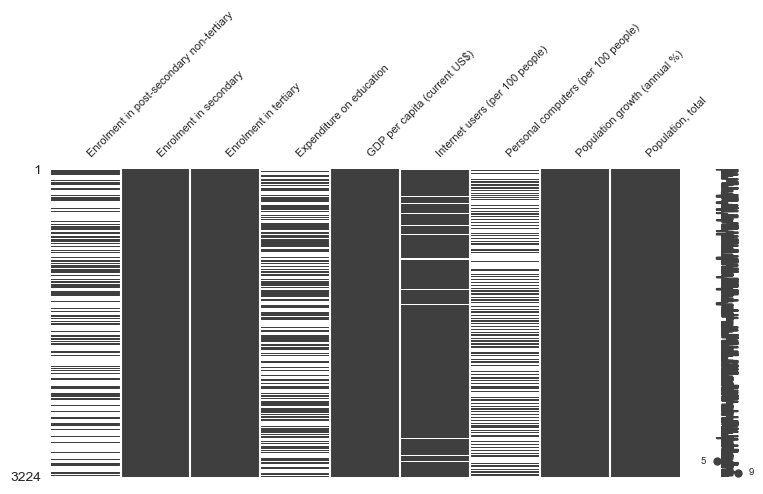

In [62]:
msno.matrix(data_ml, figsize=(9,4), fontsize=8)
plt.show()

In [63]:
data_ml.describe()

,Enrolment in post-secondary non-tertiary,Enrolment in secondary,Enrolment in tertiary,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total"
count,1.111000e+03,3.224000e+03,3.224000e+03,1720.000000,3224.000000,3081.000000,1214.000000,3223.000000,3.224000e+03
mean,6.454886e+04,2.612295e+06,8.801425e+05,15.066585,13491.267650,27.850645,13.697326,1.438492,3.294682e+07
std,1.628018e+05,1.015289e+07,2.806985e+06,4.944724,21319.816563,27.347530,19.451937,1.526747,1.288985e+08
min,3.000000e+00,9.120000e+02,7.300000e+01,3.103290,111.363436,0.000000,0.014533,-3.589465,9.420000e+03
25%,1.787000e+03,8.079900e+04,1.216980e+05,11.409578,1167.970356,4.000000,1.367602,0.465692,1.134177e+06
50%,1.119900e+04,4.649545e+05,2.568887e+05,14.431720,4138.849955,17.760000,4.896394,1.265969,5.999080e+06
75%,4.550750e+04,1.574111e+06,5.011564e+05,18.264078,16355.614016,47.961624,15.871036,2.295972,2.061322e+07
max,1.672523e+06,1.295421e+08,4.336739e+07,44.801800,192989.189527,98.200000,96.170657,16.331638,1.371220e+09


#### Estimation des autres missing values

In [64]:
data_ml.isna().sum()

Enrolment in post-secondary non-tertiary    2113
Enrolment in secondary                         0
Enrolment in tertiary                          0
Expenditure on education                    1504
GDP per capita (current US$)                   0
Internet users (per 100 people)              143
Personal computers (per 100 people)         2010
Population growth (annual %)                   1
Population, total                              0
dtype: int64

In [65]:
# Imputaions..
iterimp =  IterativeImputer()
data_ml.iloc[:,:] = iterimp.fit_transform(data_ml)
data_ml.isna().sum()

Enrolment in post-secondary non-tertiary    0
Enrolment in secondary                      0
Enrolment in tertiary                       0
Expenditure on education                    0
GDP per capita (current US$)                0
Internet users (per 100 people)             0
Personal computers (per 100 people)         0
Population growth (annual %)                0
Population, total                           0
dtype: int64

In [66]:
data_ml.head()

,Enrolment in post-secondary non-tertiary,Enrolment in secondary,Enrolment in tertiary,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total"
2,38417.276653,13508.322292,250782.681620,15.397179,8751.766529,26.023380,19.044292,0.951199,58731.0
3,38417.396380,13538.987352,250790.024616,15.370253,8914.525433,27.256721,19.844786,0.655083,59117.0
4,38417.608773,13550.665496,250792.821042,15.357394,8639.308855,28.547918,20.470555,0.248351,59264.0
5,38417.597784,13539.066795,250790.043639,15.331877,8508.406915,30.284170,21.425952,-0.246659,59118.0
6,38417.380460,13501.887397,250781.140732,15.299100,8456.947997,32.282248,22.572669,-0.794787,58650.0


In [67]:
data_ml.describe()

,Enrolment in post-secondary non-tertiary,Enrolment in secondary,Enrolment in tertiary,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total"
count,3.224000e+03,3.224000e+03,3.224000e+03,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3.224000e+03
mean,5.546459e+04,2.612295e+06,8.801425e+05,15.075266,13491.267650,28.076066,22.625904,1.438247,3.294682e+07
std,1.055034e+05,1.015289e+07,2.806985e+06,3.710593,21319.816563,27.080331,24.639452,1.526574,1.288985e+08
min,3.000000e+00,9.120000e+02,7.300000e+01,3.103290,111.363436,0.000000,-1.329555,-3.589465,9.420000e+03
25%,3.241040e+04,8.079900e+04,1.216980e+05,13.162020,1167.970356,4.372650,3.370398,0.465717,1.134177e+06
50%,3.842017e+04,4.649545e+05,2.568887e+05,15.350069,4138.849955,18.900000,13.170169,1.265056,5.999080e+06
75%,4.467135e+04,1.574111e+06,5.011564e+05,16.017279,16355.614016,47.524715,35.755810,2.295856,2.061322e+07
max,1.672523e+06,1.295421e+08,4.336739e+07,44.801800,192989.189527,98.200000,142.313279,16.331638,1.371220e+09


#### Nouvel indicateur : **Potential customers**

In [68]:
data_ml['Potential customers'] = data_ml['Enrolment in secondary'] + data_ml['Enrolment in tertiary'] + data_ml['Enrolment in post-secondary non-tertiary']

#### Dataframe final 

In [69]:
df_final = pd.concat([data_final.iloc[:,:5],data_ml.iloc[:,3:]], axis=1)

In [70]:
df_final.head()

,Region,Country Code,Country,Year,Income Group,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
2,East Asia & Pacific,ASM,American Samoa,2002,Upper middle income,15.397179,8751.766529,26.023380,19.044292,0.951199,58731.0,302708.280565
3,East Asia & Pacific,ASM,American Samoa,2003,Upper middle income,15.370253,8914.525433,27.256721,19.844786,0.655083,59117.0,302746.408348
4,East Asia & Pacific,ASM,American Samoa,2004,Upper middle income,15.357394,8639.308855,28.547918,20.470555,0.248351,59264.0,302761.095310
5,East Asia & Pacific,ASM,American Samoa,2005,Upper middle income,15.331877,8508.406915,30.284170,21.425952,-0.246659,59118.0,302746.708218
6,East Asia & Pacific,ASM,American Samoa,2006,Upper middle income,15.299100,8456.947997,32.282248,22.572669,-0.794787,58650.0,302700.408588


In [71]:
df_final.to_csv('./data/df_final.csv', encoding='utf-8', index=False)